<a href="https://colab.research.google.com/github/brightxzh/movie_review/blob/main/3-1.Word2Vec_%EB%AE%AC%EB%9E%80_%EB%A6%AC%EB%B7%B0_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Word2Vec(gensim) 

- [참조:](https://www.nextobe.com/single-post/2017/06/28/%ED%95%9C%EA%B8%80-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%B0%8F-word2vec%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%9C%A0%EC%82%AC%EB%8F%84-%EB%B6%84%EC%84%9D)

## 환경 설정

In [ ]:
# gensim을 설치합니다. (Gensim은 Python 기반의 Text mining library이며, 토픽 모델링, word2vec도 지원합니다.)
!pip install -U gensim

Requirement already up-to-date: gensim in /usr/local/lib/python3.6/dist-packages (3.8.3)


In [ ]:
# NLTK를 설치합니다. (자연어 처리를 위해 광범위하게 쓰이는 Python library입니다.)
!pip install nltk

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 1.2MB/s 
     |████████████████████████████████| 460kB 51.7MB/s 
     |████████████████████████████████| 92kB 12.1MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0


### 프로세스

In [ ]:
# 구글 드라이브 연결을 위한 기본 세팅
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# 문서 ID로 실제 파일 불러오는 법
## 4/1AY0e-g5zLr3OrJ8e9JDz6URiuTE4yAbKUPHHdlU3RhH4U4Zo68JAhZAQNDs

rawdata_downloaded = drive.CreateFile({'id': '1Bn7UQL4nhTOlFc3jDpsa7bqLkeamox_x'})
rawdata_downloaded.GetContentFile('형태소분석결과_뮬란.csv')

In [ ]:
import pandas as pd

pd.set_option('max_colwidth',500)

# 파일을 DataFrame으로 전환
rawdata = pd.read_csv('형태소분석결과_뮬란.csv', header=0,encoding='utf-8', dtype=str, engine='python')

In [ ]:
rawdata

,Unnamed: 0,nickname,text,score,like,dislike,time,watch_movie
0,0,다람다람(kky0****),"원작을 뛰어넘는 작품은 없다지만 굳이 끼워넣은 인위적인 설정과 무미건조한 주인공의 표정, 고증없이 나열된 영화 속 동양의 세계에 실망스러웠습니다. 심지어 영화를 관통하는 큰 가치가 악역 보리 칸에게도 존재해 이 사...",6,765,193,2020-09-17 20:14:00,관람객
1,1,Ataraxia(jisa****),킬링타임용 영상미는 좋으나 스토리등 유치하고 별로 원작보다노잼임,4,551,81,2020-09-18 01:33:00,관람객
2,2,Vinn(kyoo****),일단... 디지스타일의 애니메이션은 노래와 시대적 센스를 반영해서 재구성한 작품으로 호불호가 갈림에도 역시 디즈니!! 답다라는 평을 주는데... 이건.. 그냥 진지한 중국 무협영화를 영어로 보는 느낌? 스토리야 디즈...,1,434,38,2020-09-19 02:31:00,관람객
3,3,ghks****,이걸 한번 볼바엔 반도를 10번 보겠습니다,1,450,57,2020-09-17 12:43:00,0
4,4,calm****,별 로 재 미 없 습 니 다 ; ; ;,6,393,62,2020-09-18 14:54:00,관람객
...,...,...,...,...,...,...,...,...
4515,4515,Chris(jing****),왜 네이버 ㅅㅐㄲㅣ는 네티즌 평점 없애놨지?,1,6,124,2020-09-21 14:29:00,0
4516,4516,클로이(reqq****),"중화사상범벅, 노래빼면 평점0점",1,266,482,2020-09-17 12:29:00,0
4517,4517,토갱이(shak****),여러분의 시간과 돈은 소중합니다차라리 이돈과 시간으로 리얼이나 염력을다시보기하세요,1,2,396,2020-09-20 01:43:00,0
4518,4518,단팥빵극호(21in****),이게 디즈니 뮬란을 실사화한거라고? ㅋㅋ 그냥 영어쓰는 중국식 무협영화. 노력으로 성장하던 뮬란은 어디가고 태생이 무림고수...,1,438,952,2020-09-17 10:14:00,0


In [ ]:
rawtext = pd.DataFrame(rawdata['text'])

In [ ]:
rawtext

,text
0,"원작을 뛰어넘는 작품은 없다지만 굳이 끼워넣은 인위적인 설정과 무미건조한 주인공의 표정, 고증없이 나열된 영화 속 동양의 세계에 실망스러웠습니다. 심지어 영화를 관통하는 큰 가치가 악역 보리 칸에게도 존재해 이 사..."
1,킬링타임용 영상미는 좋으나 스토리등 유치하고 별로 원작보다노잼임
2,일단... 디지스타일의 애니메이션은 노래와 시대적 센스를 반영해서 재구성한 작품으로 호불호가 갈림에도 역시 디즈니!! 답다라는 평을 주는데... 이건.. 그냥 진지한 중국 무협영화를 영어로 보는 느낌? 스토리야 디즈...
3,이걸 한번 볼바엔 반도를 10번 보겠습니다
4,별 로 재 미 없 습 니 다 ; ; ;
...,...
4515,왜 네이버 ㅅㅐㄲㅣ는 네티즌 평점 없애놨지?
4516,"중화사상범벅, 노래빼면 평점0점"
4517,여러분의 시간과 돈은 소중합니다차라리 이돈과 시간으로 리얼이나 염력을다시보기하세요
4518,이게 디즈니 뮬란을 실사화한거라고? ㅋㅋ 그냥 영어쓰는 중국식 무협영화. 노력으로 성장하던 뮬란은 어디가고 태생이 무림고수...


In [ ]:
rawtext.dropna(axis=0)

,text
0,"원작을 뛰어넘는 작품은 없다지만 굳이 끼워넣은 인위적인 설정과 무미건조한 주인공의 표정, 고증없이 나열된 영화 속 동양의 세계에 실망스러웠습니다. 심지어 영화를 관통하는 큰 가치가 악역 보리 칸에게도 존재해 이 사..."
1,킬링타임용 영상미는 좋으나 스토리등 유치하고 별로 원작보다노잼임
2,일단... 디지스타일의 애니메이션은 노래와 시대적 센스를 반영해서 재구성한 작품으로 호불호가 갈림에도 역시 디즈니!! 답다라는 평을 주는데... 이건.. 그냥 진지한 중국 무협영화를 영어로 보는 느낌? 스토리야 디즈...
3,이걸 한번 볼바엔 반도를 10번 보겠습니다
4,별 로 재 미 없 습 니 다 ; ; ;
...,...
4515,왜 네이버 ㅅㅐㄲㅣ는 네티즌 평점 없애놨지?
4516,"중화사상범벅, 노래빼면 평점0점"
4517,여러분의 시간과 돈은 소중합니다차라리 이돈과 시간으로 리얼이나 염력을다시보기하세요
4518,이게 디즈니 뮬란을 실사화한거라고? ㅋㅋ 그냥 영어쓰는 중국식 무협영화. 노력으로 성장하던 뮬란은 어디가고 태생이 무림고수...


In [ ]:
## 공백값(NAN) 제거
rawtext = rawtext.dropna(axis=0)

In [ ]:
import time
start_vect=time.time()

from konlpy.tag import Okt
from konlpy.utils import pprint
okt = Okt()

pos = lambda d: [''.join(p) for p in okt.nouns(d)]
texts_ko = [pos(result) for result in rawtext['text']]

print("training Runtime: %0.2f Minutes"%((time.time() - start_vect)/60))

training Runtime: 0.38 Minutes


In [ ]:
texts_ko

[['원작',
  '작품',
  '굳이',
  '인위',
  '설정',
  '주인공',
  '표정',
  '고증',
  '나열',
  '영화',
  '속',
  '동양',
  '세계',
  '실망',
  '심지어',
  '영화',
  '관통',
  '가치',
  '악역',
  '보리',
  '칸',
  '존재',
  '이',
  '사'],
 ['킬링타임', '용', '상미', '스토리', '등', '별로', '원작', '노잼', '임'],
 ['일단',
  '스타일',
  '애니메이션',
  '노래',
  '시대',
  '센스',
  '반영',
  '작품',
  '호불호',
  '갈림',
  '역시',
  '디즈니',
  '답',
  '다라',
  '평',
  '이건',
  '그냥',
  '중국',
  '무협',
  '영화',
  '영어',
  '느낌',
  '스토리',
  '디'],
 ['걸', '한번', '볼바', '반도', '번'],
 ['별', '로', '재', '습', '니'],
 ['유역비',
  '홍콩',
  '진압하',
  '경창',
  '응원',
  '포스트',
  '햇',
  '던데',
  '그',
  '사람',
  '영화',
  '놈',
  '중국',
  '지지',
  '디즈니',
  '스타워즈',
  '를',
  '쳐넣드',
  '중국',
  '휘',
  '홍콩',
  '대만',
  '무시',
  '배우',
  '인'],
 ['점', '뭐', '댓글', '알바', '임', '디즈니', '출연', '진', '제대로'],
 ['스포일러', '포함', '감상', '평', '감상', '평', '보기'],
 ['더', '이상', '관람', '해도', '것'],
 ['음', '디즈니', '정말', '실망'],
 ['스포일러', '포함', '감상', '평', '감상', '평', '보기'],
 ['디즈니', '실망'],
 ['영화', '짜장', '이', '꼴'],
 ['내', '어린시절', '뮬란'],
 ['중국', '점', '주지', '맙시', '저'

In [ ]:
start_vect=time.time()

# training 모델 훈련

from gensim.models import word2vec
wv_model_ko = word2vec.Word2Vec(texts_ko, size=1000, window=10, min_count=0, iter=10, sg=1)
## size=차원의 숫자(올라갈수록 상세히 하지만 느림) 100
## window=주변을 보는 범위(앞뒤 5) 
## min_count=최소 출현 빈도 100
## workers=사용하는 CPU 코어 숫자
## iter = 반복횟수 10
## sg= CBOW=0 / Skip-Gram=1

#from gensim.models import FastText
#wv_model_ko = FastText(texts_ko, size=1000, window=10, min_count=0, iter=10, sg=1)


wv_model_ko.init_sims(replace=True)
wv_model_ko.save('ko_word2vec_e.model')

print("training Runtime: %0.2f Minutes"%((time.time() - start_vect)/60))

training Runtime: 0.10 Minutes


In [ ]:
## 입력 단어 확인용
from gensim.models import word2vec
model = word2vec.Word2Vec.load('ko_word2vec_e.model')

## 총 단어 숫자
len(model.wv.vocab.keys())

4288

In [ ]:
## 전체 단어 리스트
list(model.wv.index2word)

['영화',
 '디즈니',
 '뮬란',
 '중국',
 '원작',
 '감상',
 '평',
 '유역비',
 '진짜',
 '그냥',
 '스토리',
 '점',
 '평점',
 '이',
 '돈',
 '보기',
 '볼',
 '것',
 '왜',
 '액션',
 '생각',
 '애니',
 '포함',
 '스포일러',
 '더',
 '연기',
 '재미',
 '실사',
 '감동',
 '거',
 '애니메이션',
 '배우',
 '정말',
 '사람',
 '최악',
 '좀',
 '홍콩',
 '보고',
 '느낌',
 '무협',
 '말',
 '내',
 '걸',
 '뭐',
 '시간',
 '정도',
 '그',
 '실망',
 '하나',
 '별로',
 '노래',
 '개',
 '보이콧',
 '노잼',
 '임',
 '개연',
 '연출',
 '이건',
 '영상',
 '쓰레기',
 '안',
 '상미',
 '캐릭터',
 '수',
 '도',
 '내용',
 '알바',
 '기대',
 '때',
 '보지',
 '짱깨',
 '장면',
 '자체',
 '작품',
 '저',
 '주인공',
 '역시',
 '논란',
 '중국영화',
 '마녀',
 '나',
 '함',
 '부분',
 '알라딘',
 '스케일',
 '수준',
 '공리',
 '영어',
 '차라리',
 '중',
 '다른',
 '만',
 '여자',
 '듯',
 '감독',
 '또',
 '지지',
 '나름',
 '전',
 '자본',
 '탄압',
 '매력',
 '눈',
 '처음',
 '여성',
 '공산당',
 '완전',
 '움',
 '견자단',
 '영화로',
 '못',
 '정치',
 '무슨',
 '게',
 '난',
 '최고',
 '조금',
 '한번',
 '무슈',
 '이해',
 '이상',
 '다시',
 '걱정',
 '전개',
 '추천',
 '대한',
 '만화',
 '배경',
 '애',
 '때문',
 '마지막',
 '중간',
 '번',
 '이연걸',
 '망작',
 '포인트',
 '문제',
 '꼭',
 '아이',
 '용',
 '위',
 '위구르',
 '무술',
 '영화관',
 '건',


In [ ]:
# test 결과보기
print(wv_model_ko.most_similar(pos('기생충'), topn=50))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


KeyError: ignored

In [ ]:
# test 결과보기
print(wv_model_ko.most_similar(pos('박찬욱'), topn=50))

[('작', 0.9674420356750488), ('살인의추억', 0.9617370963096619), ('이자', 0.9582974910736084), ('마스터피스', 0.9569458961486816), ('감사', 0.9563540816307068), ('퀄리티', 0.95586097240448), ('마더', 0.9490038156509399), ('옥자', 0.9469808340072632), ('매번', 0.9445124864578247), ('이제', 0.9443850517272949), ('걸작', 0.9412665963172913), ('메이드', 0.9408504366874695), ('대중성', 0.9395298361778259), ('전작', 0.939502477645874), ('화의', 0.9385452270507812), ('웰', 0.9384967088699341), ('이슈', 0.935400128364563), ('관심', 0.9335483312606812), ('조합', 0.9335225820541382), ('대작', 0.9319749474525452), ('명성', 0.9310036897659302), ('개그', 0.9307863712310791), ('스타일', 0.9306840896606445), ('할리우드', 0.9300297498703003), ('역시', 0.9280967116355896), ('한계', 0.9266097545623779), ('획', 0.9261237978935242), ('찬사', 0.9249261617660522), ('최고다', 0.9242517948150635), ('독립영화', 0.9241885542869568), ('화중', 0.9230214357376099), ('영화사', 0.9229180812835693), ('코드', 0.922746479511261), ('그간', 0.9226624965667725), ('상상력', 0.9224860668182373), ('루', 0.92

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [ ]:
print(wv_model_ko.most_similar(positive=[u'현실'], negative=[u'꿈'], topn=50))

[('부분', 0.5552705526351929), ('별로', 0.5350210666656494), ('중간', 0.5308083295822144), ('다른', 0.5269633531570435), ('애니메이션', 0.5215919017791748), ('노래', 0.5207911729812622), ('내용', 0.5176306366920471), ('특유', 0.5169786810874939), ('개연', 0.5072001814842224), ('실사', 0.5013956427574158), ('성도', 0.4993773102760315), ('비교', 0.49742817878723145), ('기대', 0.49536001682281494), ('원작', 0.492684930562973), ('미도', 0.4908192753791809), ('상미', 0.49035170674324036), ('생각', 0.4854593873023987), ('나름', 0.4847579896450043), ('애니', 0.48338955640792847), ('연기', 0.48338598012924194), ('영상', 0.4830538034439087), ('연출', 0.48278841376304626), ('스토리', 0.48138922452926636), ('매력', 0.4808807671070099), ('중국영화', 0.48038744926452637), ('영어', 0.4801785945892334), ('음악', 0.47418344020843506), ('뮤지컬', 0.47214508056640625), ('조금', 0.46776485443115234), ('하나', 0.46680349111557007), ('느낌', 0.4638281464576721), ('전개', 0.4633447825908661), ('차라리', 0.4631580710411072), ('무협', 0.46104684472084045), ('다만', 0.4594278037548065),

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
print(wv_model_ko.most_similar(positive=[u'현실', '사회'], negative=[u'꿈'], topn=50))

[('연성', 0.9991353154182434), ('예상', 0.998912513256073), ('진행', 0.9988305568695068), ('시아', 0.9987370371818542), ('꽤', 0.9987303018569946), ('개판', 0.9986964464187622), ('삭제', 0.9986058473587036), ('흐름', 0.9984478950500488), ('신', 0.99840247631073), ('그것', 0.9983862042427063), ('약간', 0.9983434677124023), ('반전', 0.9982970952987671), ('중국어', 0.9982268810272217), ('색감', 0.9981217384338379), ('짜임새', 0.9980183839797974), ('그닥', 0.9979659914970398), ('로써', 0.9979104399681091), ('리플렉션', 0.9978657960891724), ('스타일', 0.997847318649292), ('샹', 0.9978453516960144), ('신도', 0.9978220462799072), ('구리', 0.9977177977561951), ('또한', 0.9977006316184998), ('반', 0.997698187828064), ('굿', 0.9975742697715759), ('성', 0.9975079894065857), ('수현', 0.9974716901779175), ('어디', 0.9974618554115295), ('갈수록', 0.9974035620689392), ('퀄리티', 0.9974015355110168), ('주요', 0.9974002242088318), ('집중', 0.9972320795059204), ('읭', 0.9972055554389954), ('부족', 0.9971867799758911), ('여', 0.9970797300338745), ('쫌', 0.9970330595970154)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


In [ ]:
print(wv_model_ko.most_similar(positive=[u'현실', '사회'], negative=[u'꿈', '빈부격차'], topn=50))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


KeyError: ignored

## 시각화

### http://projector.tensorflow.org/


### Publish 용 링크
http://projector.tensorflow.org/?config=https://gist.githubusercontent.com/ddokbaro/1d57b83de08d791e2905e9726fe1c215/raw/a6178fe978bdacd12d81da49d92eecb40e4b572a/test.json


### Publish 참조 페이지
https://medium.com/@aakashchotrani/visualizing-your-own-word-embeddings-using-tensorflow-688b3a7750ee


### 전체Top1000

In [ ]:
# your current directory 
!pwd

## 한국어:     !wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip"
## 번자체한자: !wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSerifCJKtc-hinted.zip"

!wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip"

# remove files in zip file if they exist
!rm LICENSE_OFL.txt README *.otf 

# unzip downloaded files
## 한국어: !unzip NotoSansCJKkr-hinted.zip
## 번체자한자: !unzip NotoSerifCJKtc-hinted.zip

!unzip NotoSansCJKkr-hinted.zip

# move font files to 'fonts/truetype' directory
## 한국어: !mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/
## 번체자한자: !mv NotoSerifCJKtc-Medium.otf /usr/share/fonts/truetype/

!mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/

/content
--2020-11-15 11:58:02--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 172.217.164.144, 2607:f8b0:4004:814::2010
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|172.217.164.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121163981 (116M) [application/zip]
Saving to: ‘NotoSansCJKkr-hinted.zip’

NotoSansCJKkr-hinte 100%[===================>] 115.55M   144MB/s    in 0.8s    

2020-11-15 11:58:03 (144 MB/s) - ‘NotoSansCJKkr-hinted.zip’ saved [121163981/121163981]

rm: cannot remove 'LICENSE_OFL.txt': No such file or directory
rm: cannot remove 'README': No such file or directory
rm: cannot remove '*.otf': No such file or directory
Archive:  NotoSansCJKkr-hinted.zip
  inflating: LICENSE_OFL.txt         
  inflating: NotoSansCJKkr-Black.otf  
  inflating: NotoSansCJKkr-Bold.otf  
  inflating

In [ ]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = 'ko_word2vec_e.model'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:300,:])
# X_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


4288
[-0.00317191 -0.00014311  0.04000314  0.00084464  0.07328232 -0.00119072
  0.02294083 -0.01918685 -0.04329706  0.03719319]


In [ ]:
df = pd.DataFrame(X_tsne, index=vocab[:300], columns=['x', 'y'])
df.shape

NameError: ignored

In [ ]:
df.head(10)

,x,y
원작,13.496807,-14.309395
작품,15.988364,-8.873857
굳이,-1.932000,-6.937766
인위,2.884903,0.723356
설정,8.782300,-9.650185
주인공,0.904269,-4.993238
표정,6.013052,-10.112748
고증,-2.542018,9.020256
나열,-8.331813,8.914817
영화,-1.524336,-9.436672


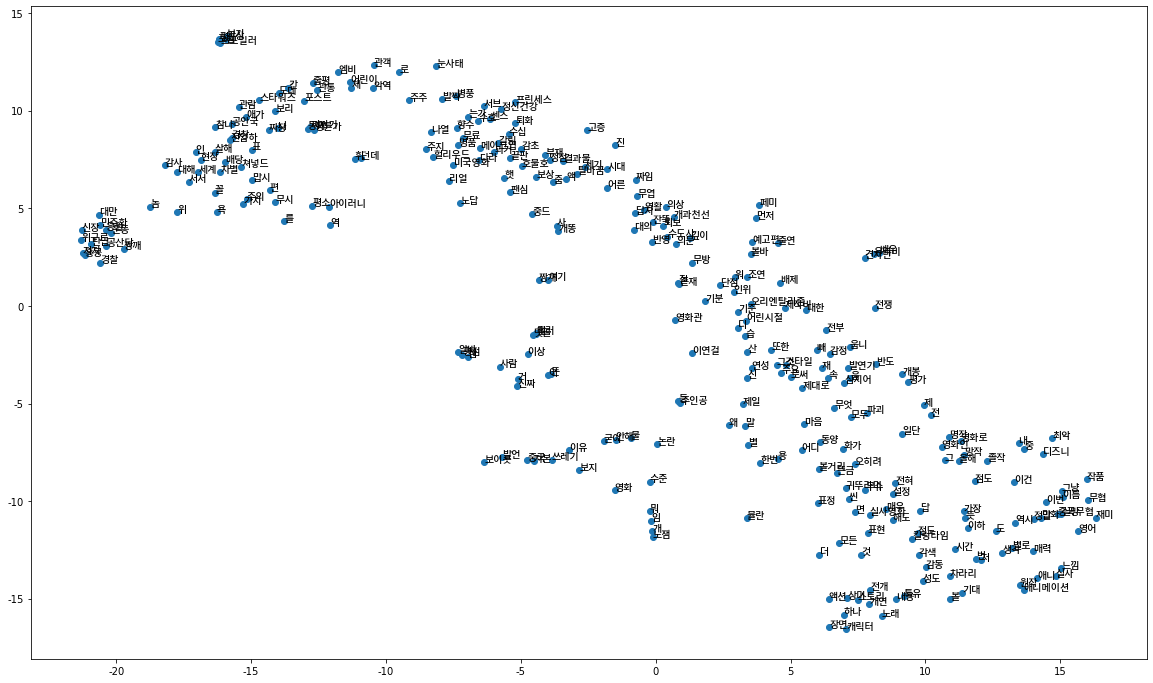

In [ ]:
import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/NotoSansCJKkr-Medium.otf'
fontprop = fm.FontProperties(fname=path, size=10)

fig = plt.figure()
fig.set_size_inches(20, 12)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontproperties=fontprop)
plt.show()

### 전체 시각화

In [ ]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = 'ko_word2vec_e.model'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
tsne = TSNE(n_components=3)

In [ ]:
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=3, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

In [ ]:
import time
start_vect=time.time()

X_tsne = tsne.fit_transform(X)
# X_tsne = tsne.fit_transform(X)

print("training Runtime: %0.2f Minutes"%((time.time() - start_vect)/60))

training Runtime: 2.96 Minutes


In [ ]:
df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y','z'])
df.shape

(4288, 3)

In [ ]:
df

,x,y,z
원작,10.191525,-14.496655,0.198717
작품,8.164314,-8.872946,-3.076508
굳이,7.491731,-7.483608,-3.640963
인위,11.696875,-1.262174,2.619777
설정,11.687483,-12.331502,0.042555
...,...,...,...
품평,-9.271988,-0.923457,-5.456933
샤먼,-0.577256,-12.737057,3.998075
이돈,-0.482728,7.569778,2.308620
염력,3.982234,9.215817,2.125252


In [ ]:
df.to_csv('dimension.tsv', sep="\t", index=False, header=None, encoding='utf-8')

In [ ]:
df['words'] = df.index
words = df['words']
words.to_csv('words.tsv', sep="\t", index=False, header=None, encoding='utf-8')